In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [22]:
df=pd.read_csv("customer_segmentation.csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [8]:
df['Age'] = 2026 - df["Year_Birth"]

In [9]:
df['Family_Size'] = df['Kidhome'] + df['Teenhome']

In [10]:
df["Total_Spending"] = (
    df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] +
    df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]
)

In [11]:
features = ["Income", "Age", "Family_Size", "Recency", "Total_Spending"]
X = df[features]

In [12]:
X = X.fillna(X.mean())


In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


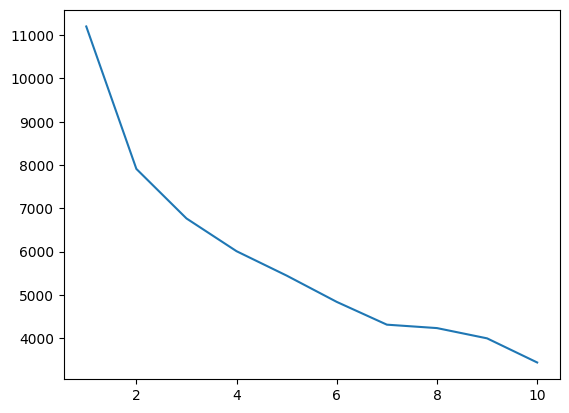

In [14]:
wcss = []

for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

plt.plot(range(1, 11), wcss)
plt.show()

In [15]:
kmeans = KMeans(n_clusters=4, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

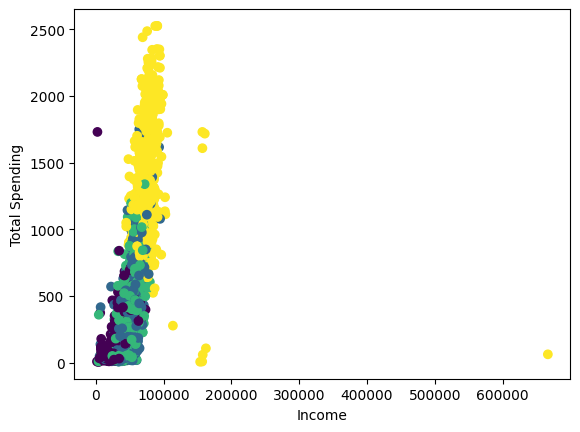

In [16]:
plt.scatter(df["Income"], df["Total_Spending"], c=df["Cluster"])
plt.xlabel("Income")
plt.ylabel("Total Spending")
plt.show()